In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel("data/PDMS.xlsx")

In [2]:
df.drop('Strata', axis=1, inplace=True)
df.drop('RID', axis=1, inplace=True)
df.drop('FCSG', axis=1, inplace=True)

In [3]:
df.head()

,PDM6_HHsize,PDM6_total_debt,PDM6_num_adults,PDM6_num_working_age,PDM6_num_elderly,PDM6_num_children,PDM6_num_schoolage_children,PDM6_x_food30days,PDM6_x_total,PDM6_x_pc_food30days,FCS,rCSI,PDM6_debt_3monthsYN,PDM6_total_debt.1
0,4,595,3,3,0,1,1,1714.285714,3090.285714,428.571429,51.0,7,1,595
1,5,2500,2,2,0,3,0,857.142857,1987.142857,171.428571,65.0,11,1,2500
2,6,5000,5,4,1,1,1,1285.714286,3150.714286,214.285714,87.0,17,1,5000
3,4,4000,2,2,0,2,0,428.571429,1223.571429,107.142857,78.0,15,1,4000
4,6,3000,3,3,0,3,3,321.428571,1121.428571,53.571429,47.0,13,1,3000


In [6]:
from sklearn.preprocessing import StandardScaler

col=df.columns
feature=col.tolist() 

data=df.loc[:,feature].values  

sc=StandardScaler()  
data=sc.fit_transform(data) 
data_x=pd.DataFrame(data,columns=feature).head()

In [7]:
data_x.head()

,PDM6_HHsize,PDM6_total_debt,PDM6_num_adults,PDM6_num_working_age,PDM6_num_elderly,PDM6_num_children,PDM6_num_schoolage_children,PDM6_x_food30days,PDM6_x_total,PDM6_x_pc_food30days,FCS,rCSI,PDM6_debt_3monthsYN,PDM6_total_debt.1
0,-0.734689,-0.385143,0.104447,0.271488,-0.417783,-1.062544,-0.469756,1.082455,0.380949,1.863644,-0.287346,-0.414894,0.565318,-0.385143
1,-0.334066,0.249353,-0.605198,-0.493992,-0.417783,0.010165,-1.076052,-0.429189,-0.556096,-0.305615,0.458431,-0.022137,0.565318,0.249353
2,0.066557,1.082024,1.523736,1.036968,1.595800,-1.062544,-0.469756,0.326633,0.432279,0.055928,1.630366,0.566999,0.565318,1.082024
3,-0.734689,0.748956,-0.605198,-0.493992,-0.417783,-0.526189,-1.076052,-1.185011,-1.204698,-0.847930,1.150938,0.370620,0.565318,0.748956
4,0.066557,0.415887,0.104447,0.271488,-0.417783,0.010165,0.742835,-1.373967,-1.291462,-1.299859,-0.500425,0.174242,0.565318,0.415887


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)

pca.fit(data_x)

principal_components = pca.transform(data_x)

percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)

print(pca.explained_variance_ratio_,"yuzde = ", sum(pca.explained_variance_ratio_)*100)


[4.89869574e-01 3.38506520e-01 1.53860335e-01 1.77635703e-02
 5.23048137e-33] yuzde =  100.0


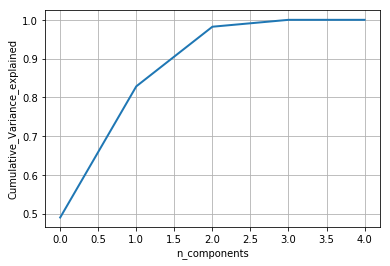

In [15]:
import matplotlib.pyplot as plt

#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [16]:
data_x=pd.DataFrame(principal_components).head()

In [17]:
data_x.head()

,0,1,2,3,4
0,2.275613,-2.025154,0.236349,-0.183477,-2.530466e-16
1,-0.700054,-0.693253,-0.732688,0.581498,7.172227e-16
2,1.884678,2.430633,0.092725,0.057324,-6.297262e-16
3,-1.546337,0.252907,-1.232556,-0.421487,-5.350635e-16
4,-1.913900,0.034866,1.636169,-0.033859,8.064060e-16
